## Text clustering with K-means
In this project we will segment the headlines from ABC for 15 years. The project has some sample data of 20K headlines. However the full dataset is available for the practice and further research. The objective is to identify the possible segments and optimize the K value. Subsequently visualize the segments/clusters formed by the segmentation.

In [1]:
#Import the required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [23]:
#Read headlines data
data = pd.read_csv("C:\\Users\\Somesh\\Jupyter_Python\\JBS_Practicals\\Data_Analytics\\news_headlines.csv")
data.head()

,Unnamed: 0,publish_date,headline_text
0,355023,20080106,kibaki offers unified kenyan govt
1,508861,20091223,gp deregistered over depression prescriptions
2,374650,20080404,opposition wants more protection for indigenous
3,958559,20150608,queens birthday honours recognise country
4,549951,20100712,smith wont commit to second term ets


In [25]:
dataSample = data.sample(5000)
dataSample.head()

,Unnamed: 0,publish_date,headline_text
11939,217016,20060207,aust closes west bank mission amid anti cartoon
16599,191647,20050930,police get tough on drunk dangerous drivers
18615,194741,20051016,sydney parklands design competition opens
7912,340119,20071027,17 killed in maoist rebel attack in india
4983,595852,20110219,tigers let finals chance slip


In [3]:
data['year'] = data['publish_date'].apply(str).str[:4]

In [4]:
data.head()

,Unnamed: 0,publish_date,headline_text,year
0,355023,20080106,kibaki offers unified kenyan govt,2008
1,508861,20091223,gp deregistered over depression prescriptions,2009
2,374650,20080404,opposition wants more protection for indigenous,2008
3,958559,20150608,queens birthday honours recognise country,2015
4,549951,20100712,smith wont commit to second term ets,2010


In [5]:
#Transform the data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.headline_text.values)
print(X[1])

  (0, 12096)	1
  (0, 4585)	1
  (0, 4599)	1
  (0, 6880)	1


In [6]:
#Transform the data with TfIdf
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.headline_text.values)
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

17491
['doughty', 'douglas', 'douse', 'douses', 'dousing', 'dowling', 'downed', 'downer', 'downey', 'downgrade', 'downgrades', 'downie', 'downing', 'download', 'downloads', 'downplayed', 'downplaying', 'downplays', 'downpour', 'downs', 'downsize', 'downstream', 'downturn', 'downward', 'downwplays', 'doyle', 'dozen', 'dozens', 'dozer', 'dpi', 'dpp', 'dr', 'draft', 'draftees', 'drafts', 'drag', 'dragged', 'dragging', 'dragon', 'dragons', 'drags', 'drain', 'drainage', 'drains', 'drama', 'dramatic', 'draper', 'draw', 'drawing', 'drawings', 'drawn', 'draws', 'drayton', 'drc', 'dream', 'dreamliner', 'dreams', 'dreamworld', 'dredges', 'dredging', 'dree', 'drefus', 'drenching', 'dressed', 'dressmaker', 'dried', 'drier', 'dries', 'driest', 'drift', 'drill', 'drilling', 'drink', 'drinkers', 'drinking', 'drinks', 'drip', 'drive', 'driven', 'driver', 'drivers', 'drives', 'driveway', 'driving', 'drizzly', 'drogba', 'drone', 'drones', 'drop', 'dropped', 'dropping', 'drops', 'drought', 'droughts', 'd

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
#Build the clusters
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=8, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
#Profile the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
words = []
for i in range(true_k):
    word_list = []
    #print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        #print(' %s' % terms[ind])
        word_list.append(terms[ind])
    words.append(word_list)
df_words = pd.DataFrame(words)
df_words

Top terms per cluster:


,0,1,2,3,4,5,6,7,8,9
0,sri,lanka,lankan,killed,sangakkara,rebels,aid,caps,govt,seekers
1,man,court,hour,country,murder,charged,2014,accused,told,face
2,says,australian,nsw,crash,death,abc,killed,market,china,open
3,police,probe,investigate,man,missing,hunt,search,seek,car,crash
4,concerns,mining,youth,park,aired,raises,national,marine,safety,health
5,council,plan,land,water,development,rate,funding,seeks,rates,pay
6,new,interview,govt,plan,water,qld,health,wa,win,report
7,australia,day,south,vs,india,post,world,pakistan,cup,cricket


Inferring the groups from the above matrix, we conclude the following segments:

    * Cluster 0 - Governament News
    * Cluster 1 - Agriculture
    * Cluster 2, Cluster 6, Cluster 7 - Crime
    * Cluster 3, Cuuster 4 - Environment
    * Cluster 5 - Sports        

In [10]:
#Assign the cluster number to each headline
cluster = model.predict(X)

In [11]:
data['cluster']=cluster

In [12]:
#Inspect the data
data.head()

,Unnamed: 0,publish_date,headline_text,year,cluster
0,355023,20080106,kibaki offers unified kenyan govt,2008,6
1,508861,20091223,gp deregistered over depression prescriptions,2009,6
2,374650,20080404,opposition wants more protection for indigenous,2008,6
3,958559,20150608,queens birthday honours recognise country,2015,6
4,549951,20100712,smith wont commit to second term ets,2010,6


In [13]:
pd.crosstab(data.cluster, data.year)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
cluster,,,,,,,,,,,,,,,
0,2,3,2,5,4,8,6,4,0,3,1,0,2,2,0
1,35,41,32,46,57,38,47,58,51,49,64,100,64,38,27
2,116,168,135,133,155,141,169,121,143,171,174,166,178,118,83
3,36,46,49,41,63,56,51,42,43,60,31,38,35,22,24
4,17,10,11,18,24,16,16,12,16,28,23,17,15,19,11
5,25,19,25,28,25,27,21,12,17,12,15,18,15,12,7
6,867,1054,1067,966,1042,1110,1086,1097,1140,1281,1331,1077,1108,760,649
7,10,8,12,11,9,10,8,9,8,24,26,24,23,24,31


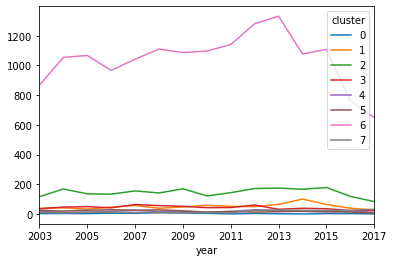

In [14]:
pd.crosstab(data.year,data.cluster).plot()

In [15]:
#Now add the cluster descriptions to data and analyze
import numpy as np
data['Segment'] = np.where(data['cluster']==0, 'Govt', 'Others')

#Inspect the data
data.head()

,Unnamed: 0,publish_date,headline_text,year,cluster,Segment
0,355023,20080106,kibaki offers unified kenyan govt,2008,6,Others
1,508861,20091223,gp deregistered over depression prescriptions,2009,6,Others
2,374650,20080404,opposition wants more protection for indigenous,2008,6,Others
3,958559,20150608,queens birthday honours recognise country,2015,6,Others
4,549951,20100712,smith wont commit to second term ets,2010,6,Others


In [16]:
#Inspect in a crosstab
pd.crosstab(data.Segment, data.year)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Segment,,,,,,,,,,,,,,,
Govt,2,3,2,5,4,8,6,4,0,3,1,0,2,2,0
Others,1106,1346,1331,1243,1375,1398,1398,1351,1418,1625,1664,1440,1438,993,832


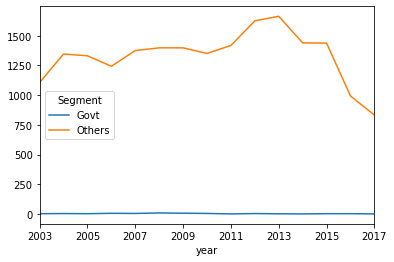

In [17]:
#Inspect in a crosstab in a plot
pd.crosstab(data.year, data.Segment).plot()

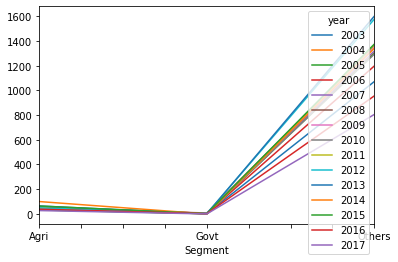

In [18]:
#Now add the cluster descriptions to data and analyze
import numpy as np
data['Segment'] = np.where(data['cluster']==0, 'Govt', np.where(data['cluster']==1, 'Agri', 'Others'))

#Inspect the data
data.head()

#Inspect in a crosstab
pd.crosstab(data.Segment, data.year)

#Inspect in a crosstab in a plot
pd.crosstab(data.Segment, data.year).plot()

In [19]:
#Now add the cluster descriptions to data and analyze
import numpy as np
data['Segment'] = np.where(data['cluster']==0, 'Govt', np.where(data['cluster']==1, 'Agri', np.where(data['cluster']==2, 'Crime','Others')))

#Inspect the data
data.head()

,Unnamed: 0,publish_date,headline_text,year,cluster,Segment
0,355023,20080106,kibaki offers unified kenyan govt,2008,6,Others
1,508861,20091223,gp deregistered over depression prescriptions,2009,6,Others
2,374650,20080404,opposition wants more protection for indigenous,2008,6,Others
3,958559,20150608,queens birthday honours recognise country,2015,6,Others
4,549951,20100712,smith wont commit to second term ets,2010,6,Others


In [20]:
#Inspect in a crosstab
pd.crosstab(data.Segment, data.year)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Segment,,,,,,,,,,,,,,,
Agri,35,41,32,46,57,38,47,58,51,49,64,100,64,38,27
Crime,116,168,135,133,155,141,169,121,143,171,174,166,178,118,83
Govt,2,3,2,5,4,8,6,4,0,3,1,0,2,2,0
Others,955,1137,1164,1064,1163,1219,1182,1172,1224,1405,1426,1174,1196,837,722


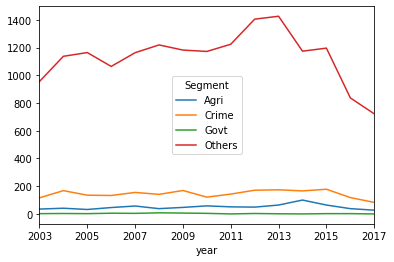

In [21]:
pd.crosstab(data.year,data.Segment).plot()

######################################################################################################################3

In [26]:
dataSample.columns

Index(['Unnamed: 0', 'publish_date', 'headline_text'], dtype='object')

In [27]:
dataSample['year'] = dataSample['publish_date'].apply(str).str[:4]

In [28]:
dataSample.head()

,Unnamed: 0,publish_date,headline_text,year
11939,217016,20060207,aust closes west bank mission amid anti cartoon,2006
16599,191647,20050930,police get tough on drunk dangerous drivers,2005
18615,194741,20051016,sydney parklands design competition opens,2005
7912,340119,20071027,17 killed in maoist rebel attack in india,2007
4983,595852,20110219,tigers let finals chance slip,2011


In [32]:
#Transform the data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataSample.headline_text.values)
print(X[1])

  (0, 2393)	1
  (0, 2022)	1
  (0, 2411)	1
  (0, 7710)	1
  (0, 5688)	1


In [33]:
#Transform the data with TfIdf
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataSample.headline_text.values)
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[1000:1100])

8462
['boggabri', 'boils', 'bojic', 'bok', 'boko', 'bold', 'bolivia', 'bollinger', 'bomb', 'bombala', 'bomber', 'bombers', 'bombing', 'bombings', 'bombs', 'bond', 'bondi', 'bonus', 'book', 'booker', 'books', 'boom', 'boomers', 'boort', 'boost', 'boosted', 'boosting', 'boosts', 'boot', 'boots', 'boral', 'border', 'bore', 'borne', 'borroloola', 'bosch', 'bosnian', 'boss', 'bosses', 'boulder', 'bounce', 'bounces', 'boundaries', 'boundary', 'bourke', 'bow', 'bowden', 'bowen', 'bowling', 'bowraville', 'bowyer', 'boxer', 'boxing', 'boy', 'boyce', 'boycott', 'boycotted', 'boyd', 'boyfriend', 'boyfriends', 'boys', 'bp', 'brabham', 'brace', 'bracelet', 'braces', 'brad', 'braddon', 'bradley', 'brady', 'bragging', 'brain', 'brainer', 'brakes', 'brand', 'brands', 'brave', 'brawl', 'brawls', 'brazil', 'breach', 'breaches', 'breaching', 'break', 'breakdown', 'breaker', 'breakers', 'breakfast', 'breaking', 'breaks', 'breakthrough', 'breakthroughs', 'breast', 'breeder', 'breeders', 'breeding', 'brendo

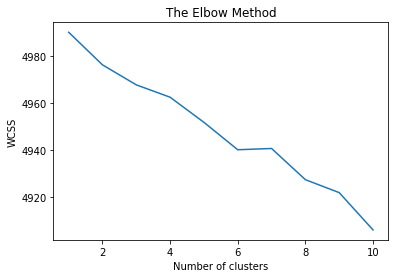

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [35]:
#Build the clusters
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=50, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
#Profile the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
words = []
for i in range(true_k):
    word_list = []
    #print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        #print(' %s' % terms[ind])
        word_list.append(terms[ind])
    words.append(word_list)
df_words = pd.DataFrame(words)
df_words

Top terms per cluster:


,0,1,2,3,4,5,6,7,8,9
0,says,govt,plan,health,nsw,sa,sydney,union,election,hospital
1,police,missing,man,probe,seek,search,investigate,woman,officer,hunt
2,new,australia,council,court,death,day,australian,plans,water,china
3,man,charged,murder,guilty,pleads,jailed,court,arrested,stabbing,jail
4,crash,killed,fatal,road,man,plane,dead,police,probe,highway
5,interview,michael,neil,henry,extended,cronk,cooper,nrl,marcus,luke


Inferring the groups from the above matrix, we conclude the following segments:

* Cluster 0 - Governament News
* Cluster 1,  Cluster 3, Cluster 4- Crime
* Cluster 2, Cluster 5 - other

In [43]:
#Assign the cluster number to each headline
cluster = model.predict(X)

In [44]:
dataSample['cluster']=cluster

In [45]:
#Inspect the data
dataSample.head()

,Unnamed: 0,publish_date,headline_text,year,cluster
11939,217016,20060207,aust closes west bank mission amid anti cartoon,2006,2
16599,191647,20050930,police get tough on drunk dangerous drivers,2005,1
18615,194741,20051016,sydney parklands design competition opens,2005,0
7912,340119,20071027,17 killed in maoist rebel attack in india,2007,4
4983,595852,20110219,tigers let finals chance slip,2011,2


In [46]:
pd.crosstab(dataSample.cluster, dataSample.year)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
cluster,,,,,,,,,,,,,,,
0,38,49,50,40,47,53,25,31,28,32,38,40,45,23,22
1,5,9,8,7,12,11,9,11,14,11,9,13,10,2,5
2,250,269,254,241,252,283,280,275,291,331,348,301,290,204,158
3,5,5,6,10,10,6,11,14,8,6,8,10,7,5,5
4,4,11,7,3,8,5,8,6,6,4,2,3,6,3,1
5,1,1,0,0,0,5,9,15,9,15,12,10,3,0,3


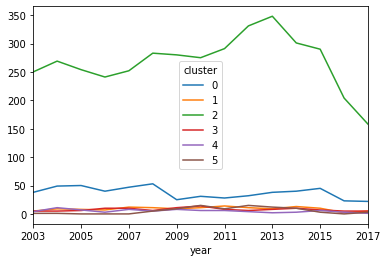

In [47]:
pd.crosstab(dataSample.year,dataSample.cluster).plot()

In [49]:
#Now add the cluster descriptions to data and analyze
import numpy as np
dataSample['Segment'] = np.where(dataSample['cluster']==0, 'Govt', 'Others')

#Inspect the data
dataSample.head()

,Unnamed: 0,publish_date,headline_text,year,cluster,Segment
11939,217016,20060207,aust closes west bank mission amid anti cartoon,2006,2,Others
16599,191647,20050930,police get tough on drunk dangerous drivers,2005,1,Others
18615,194741,20051016,sydney parklands design competition opens,2005,0,Govt
7912,340119,20071027,17 killed in maoist rebel attack in india,2007,4,Others
4983,595852,20110219,tigers let finals chance slip,2011,2,Others


In [50]:
#Inspect in a crosstab
pd.crosstab(dataSample.Segment, dataSample.year)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Segment,,,,,,,,,,,,,,,
Govt,38,49,50,40,47,53,25,31,28,32,38,40,45,23,22
Others,265,295,275,261,282,310,317,321,328,367,379,337,316,214,172


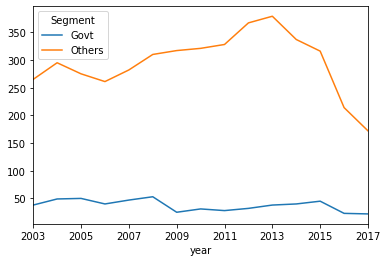

In [51]:
#Inspect in a crosstab in a plot
pd.crosstab(dataSample.year, dataSample.Segment).plot()

In [57]:
#Now add the cluster descriptions to data and analyze
import numpy as np
dataSample['Segment'] = np.where(dataSample['cluster']==0, 'Govt', np.where(dataSample['cluster']==1,'Crime', np.where(dataSample['cluster']==3,'Crime', np.where(dataSample['cluster']==4, 'Crime','Others'))))

#Inspect the data
dataSample.head()

,Unnamed: 0,publish_date,headline_text,year,cluster,Segment
11939,217016,20060207,aust closes west bank mission amid anti cartoon,2006,2,Others
16599,191647,20050930,police get tough on drunk dangerous drivers,2005,1,Crime
18615,194741,20051016,sydney parklands design competition opens,2005,0,Govt
7912,340119,20071027,17 killed in maoist rebel attack in india,2007,4,Crime
4983,595852,20110219,tigers let finals chance slip,2011,2,Others


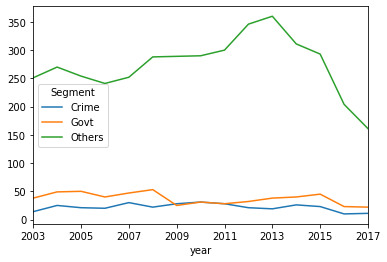

In [58]:
pd.crosstab(dataSample.year,dataSample.Segment).plot()